<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Proyecto%20final/Proyecto_final_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Librerias
import tensorflow as tf
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [4]:
files=["/content/drive/MyDrive/ML2023/Food Classification dataset/Sandwich",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Taco",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/omelette",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/sushi",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/ice_cream",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Hot Dog",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Donut",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Crispy Chicken",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/cheesecake",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/apple_pie"]

In [5]:
num_px = 64
num_categories = 10  # Categorías
num_images_per_category = 1000  # Imágenes por categoría

categorias_x = [[] for _ in range(num_categories)]

for i, carpeta in enumerate(files):
    print(carpeta,"Categoría:", i)  # Imprimir nombre de la carpeta y su número de categoría
    files_in_folder = glob.glob(carpeta + "/*")
    for j, file in enumerate(files_in_folder[:num_images_per_category]):
        img = Image.open(file)
        img = img.resize((num_px, num_px)).convert('L')  # Redimensionar imágenes y convertirlas a escala de grises
        data = np.asarray(img)
        categorias_x[i].append(data)
        img.close()

for i in range(num_categories):
    categorias_x[i] = np.array(categorias_x[i])

/content/drive/MyDrive/ML2023/Food Classification dataset/Sandwich Categoría: 0
/content/drive/MyDrive/ML2023/Food Classification dataset/Taco Categoría: 1
/content/drive/MyDrive/ML2023/Food Classification dataset/omelette Categoría: 2
/content/drive/MyDrive/ML2023/Food Classification dataset/sushi Categoría: 3
/content/drive/MyDrive/ML2023/Food Classification dataset/ice_cream Categoría: 4
/content/drive/MyDrive/ML2023/Food Classification dataset/Hot Dog Categoría: 5


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/content/drive/MyDrive/ML2023/Food Classification dataset/Donut Categoría: 6
/content/drive/MyDrive/ML2023/Food Classification dataset/Crispy Chicken Categoría: 7
/content/drive/MyDrive/ML2023/Food Classification dataset/cheesecake Categoría: 8
/content/drive/MyDrive/ML2023/Food Classification dataset/apple_pie Categoría: 9


Son 10 categorías:


* Sándwich
* Taco
* Omelette
* Sushi
* Helado
* Hot dog
* Dona
* Pollo
* Cheesecake
* Pastel de manzana

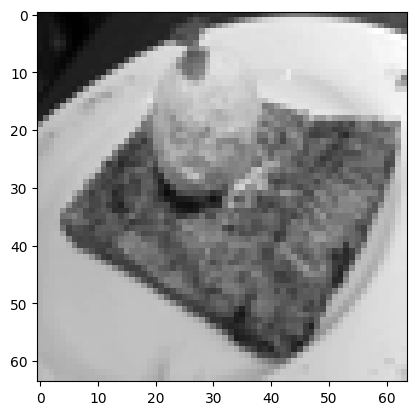

In [6]:
#Ejemplo de una imagen el primer indice es la categoría; 0 a 8, el segundo índice es el número de imagen; 0 al 99
plt.imshow(categorias_x[9][999], cmap='gray')
plt.show()

In [7]:
#Divido los datos en conjuntos de entrenamiento y validación
train_categorias_x = []
test_categorias_x = []
train_categorias_y = []
test_categorias_y = []

for i, categoria_images in enumerate(categorias_x):
    images_train, images_test = train_test_split(categoria_images, test_size=0.2, random_state=42)
    train_categorias_x.extend(images_train)
    test_categorias_x.extend(images_test)

    # Etiquetas para los conjuntos de entrenamiento
    labels_train = [i] * len(images_train)
    labels_test = [i] * len(images_test)
    train_categorias_y.extend(labels_train)
    test_categorias_y.extend(labels_test)

# Convertir listas a arrays
train_categorias_y = np.array(train_categorias_y)
test_categorias_y = np.array(test_categorias_y)

In [8]:
# formattear los conjuntos de datos de entrenamiento y prueba
train_categorias_x = np.stack(train_categorias_x)
test_categorias_x = np.stack(test_categorias_x)

# escala de grises (shape: (num_images, num_px, num_px))
train_categorias_x = train_categorias_x.reshape(-1, num_px, num_px, 1)
test_categorias_x = test_categorias_x.reshape(-1, num_px, num_px, 1)

#normalizo los datos para que vayan de 0 a 1
train_categorias_x = train_categorias_x.astype('float32') / 255.0
test_categorias_x = test_categorias_x.astype('float32') / 255.0


In [10]:
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(num_px, num_px, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_categories, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
batch_size = 40
epochs = 7 #6

#32-6. 20%
#32-10. 28%
#32 - 4. 20%
#20 - 7.
#20 - 10


history = model.fit(train_categorias_x, train_categorias_y, batch_size=batch_size, epochs=epochs, validation_data=(test_categorias_x, test_categorias_y))

Epoch 1/7
200/200 [==============================] - 84s 414ms/step - loss: 2.5733 - accuracy: 0.1854 - val_loss: 2.0021 - val_accuracy: 0.2695
Epoch 2/7
200/200 [==============================] - 80s 399ms/step - loss: 1.8260 - accuracy: 0.3521 - val_loss: 1.9031 - val_accuracy: 0.2860
Epoch 3/7
200/200 [==============================] - 82s 409ms/step - loss: 1.5147 - accuracy: 0.4816 - val_loss: 1.9222 - val_accuracy: 0.3135
Epoch 4/7
200/200 [==============================] - 81s 405ms/step - loss: 1.1709 - accuracy: 0.6230 - val_loss: 2.0230 - val_accuracy: 0.3080
Epoch 5/7
200/200 [==============================] - 80s 402ms/step - loss: 0.8410 - accuracy: 0.7541 - val_loss: 2.1717 - val_accuracy: 0.2980
Epoch 6/7
200/200 [==============================] - 84s 418ms/step - loss: 0.5528 - accuracy: 0.8550 - val_loss: 2.3879 - val_accuracy: 0.2925
Epoch 7/7
200/200 [==============================] - 81s 403ms/step - loss: 0.3373 - accuracy: 0.9290 - val_loss: 2.5936 - val_accuracy:

1/1 [==============================] - 0s 45ms/step


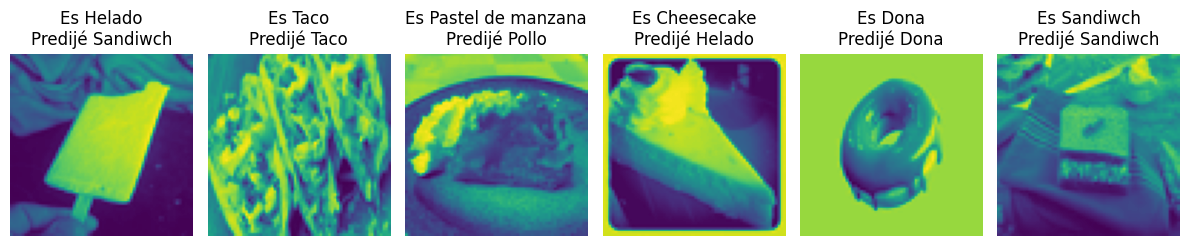

In [18]:
# Obtener algunas imágenes al azar del conjunto de prueba
num_samples = 6
random_indices = random.sample(range(len(test_categorias_x)), num_samples)
sample_images = test_categorias_x[random_indices]
sample_labels = test_categorias_y[random_indices]

# Realizar predicciones en las muestras
predictions = model.predict(sample_images)

# Categorias
classes = ["Sandiwch","Taco","Omelette","Sushi","Helado","Hot dog","Dona","Pollo","Cheesecake","Pastel de manzana"]

# Mostrar las imágenes con sus predicciones
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Es {classes[sample_labels[i]]}\nPredijé {classes[np.argmax(predictions[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()